# Evaluation pipeline

## 0 Imports and Constants

In [98]:
import sys
import os

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

In [99]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import itertools
from tqdm import tqdm
import json
from datetime import datetime

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from data_augmentation_methods.algorithmic.brownian_motion import brownian_motion

from utils.utils import load_time_series, plot_time_series_attribute, add_lagged_data, scale_data, train_test_split_to_tensor, inverse_scale_data
from utils.TimeSeriesDataset import TimeSeriesDataset

from baseline_model.LSTM import LSTM, train_model

In [100]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [101]:
DATA_FOLDER = Path("../data")
MULTIVARIATE_DATA_FOLDER = DATA_FOLDER / "multivariate"
UNIVARIATE_DATA_FOLDER = DATA_FOLDER / "univariate"
BENCHMARK = False

## 1 Load Baseline Model and Data

In [102]:
df_real = load_time_series(UNIVARIATE_DATA_FOLDER/'AAPL_open_high_low_close_adjClose_volume.csv')[['Date', 'Close']]
df_syn = brownian_motion(df_real)[['Date', 'Close']]

In [103]:

df_syn.head(), df_real.head()

(        Date     Close
 0 2010-01-04  7.643214
 1 2010-01-05  6.401063
 2 2010-01-06  6.413023
 3 2010-01-07  0.638857
 4 2010-01-08  6.460598,
         Date     Close
 0 2010-01-04  7.643214
 1 2010-01-05  7.656429
 2 2010-01-06  7.534643
 3 2010-01-07  7.520714
 4 2010-01-08  7.570714)

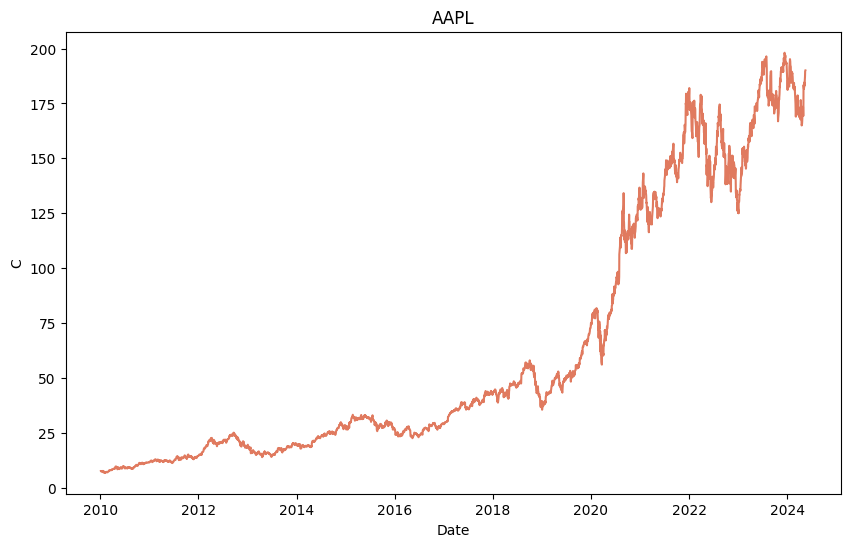

In [104]:
plot_time_series_attribute(df_real, 'AAPL')

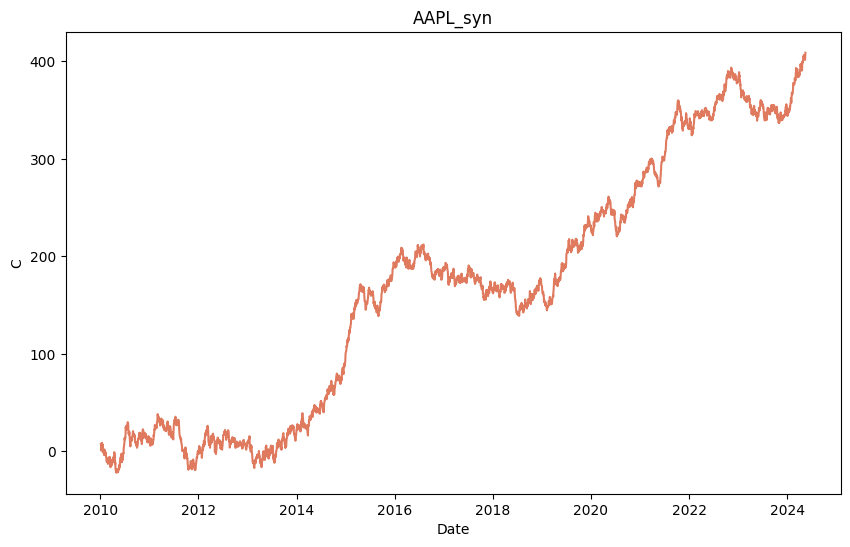

In [105]:
plot_time_series_attribute(df_syn, 'AAPL_syn')

In [106]:
# df_real = df_real[['Close']]
# df_syn = df_syn[['Close']]

## 2 Train and Test Baseline Model

### 2.1 Train on Real, Test on Synthetic

### 2.2 Train on Synthetic, Test on Real

## 3 Visualize Synthetic vs Real Data

In [107]:
# PCA Analysis
pca = PCA(n_components = 2)
pca.fit(df_real)
pca_real_results = pca.transform(df_real)
pca_syn_results = pca.transform(df_syn)

# Plotting
f, ax = plt.subplots(1)    
plt.scatter(pca_real_results[:,0], pca_real_results[:,1], alpha = 0.2, label = "Original")
plt.scatter(pca_syn_results[:,0], pca_syn_results[:,1], alpha = 0.2, label = "Synthetic")

ax.legend()  
plt.title('PCA plot')
plt.xlabel('x-pca')
plt.ylabel('y_pca')
plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
pca.explained_variance_ratio_ # 1st component explains 88.9% of the variance

array([0.88904486, 0.11086401])

In [ ]:
synthetic_data_scaled_pca[:10]

array([[-2.36441489,  0.55483014],
       [-2.49541146,  1.03006427],
       [-2.43719685,  0.81096471],
       [-2.34783222,  0.48093361],
       [-2.31150655,  0.35140587],
       [-2.32949643,  0.41555005],
       [-2.49437928,  0.9951389 ],
       [-2.5075676 ,  1.04555069],
       [-2.29525901,  0.2863127 ],
       [-2.4939798 ,  0.9933972 ]])

## 4 Save Evaluation Data